<a href="https://colab.research.google.com/github/Ben-tech254/SCT_DS_02/blob/main/SCT_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
#Loading the dataset and displaying the first 5 rows
t_data=pd.read_csv('/content/train.csv')
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
#Missing values
t_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
#handle missing values
t_data['Age']=t_data['Age'].fillna(True)
t_data['Cabin']=t_data['Cabin'].fillna(True)
t_data['Embarked']=t_data['Embarked'].fillna(True)

#Check if the missing values are still there
t_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
#Statistical analysis
t_data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [21]:
#Dropping duplicates
t_data.drop_duplicates(inplace=True)
t_data.duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'Correlation between the numeric columns')

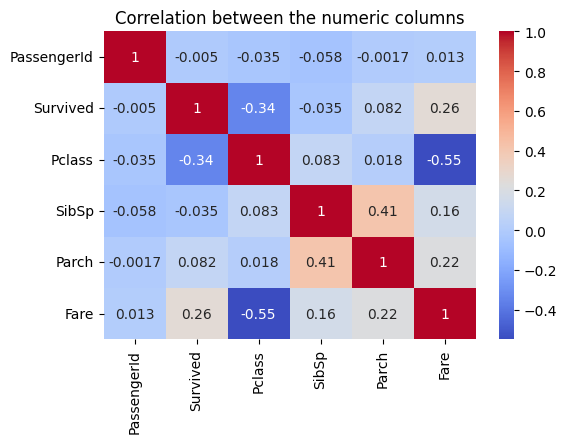

In [26]:
#correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(t_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation between the numeric columns')

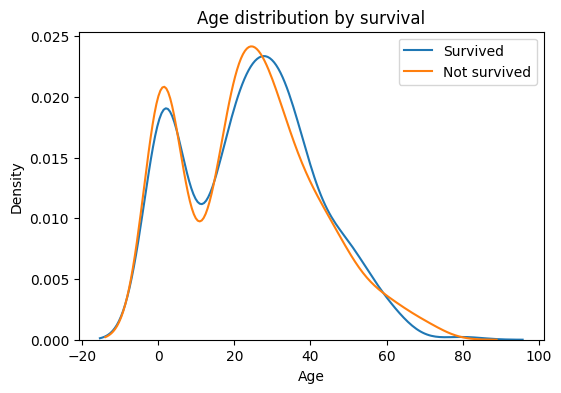

In [27]:
#Age distribution by survival
plt.figure(figsize=(6,4))
sns.kdeplot(t_data[t_data['Survived']==1]['Age'],label='Survived')
sns.kdeplot(t_data[t_data['Survived']==0]['Age'],label='Not survived')
plt.title('Age distribution by survival')
plt.legend()
plt.show()

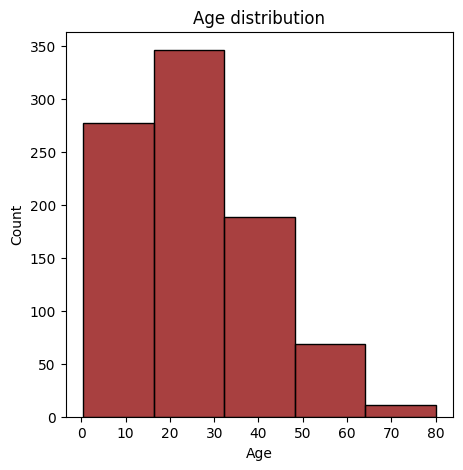

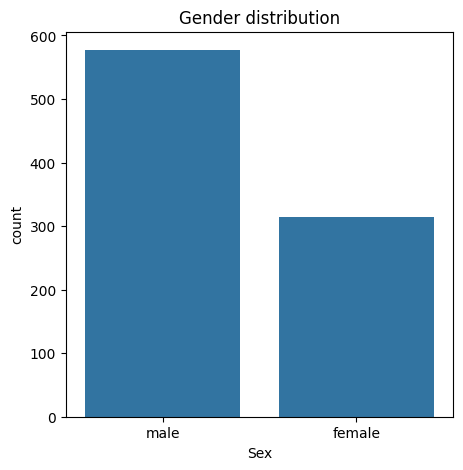

In [28]:
#Age distribution
plt.figure(figsize=(5,5))
sns.histplot(t_data['Age'],kde=False,color='darkred',bins=5)
plt.title('Age distribution')
plt.show()

#Gender distribution
plt.figure(figsize=(5,5))
sns.countplot(x='Sex',data=t_data)
plt.title('Gender distribution')
plt.show()

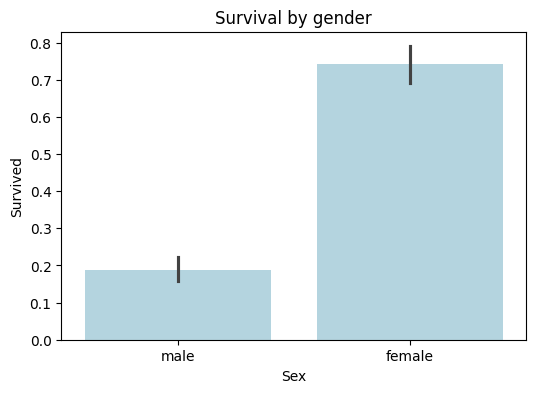

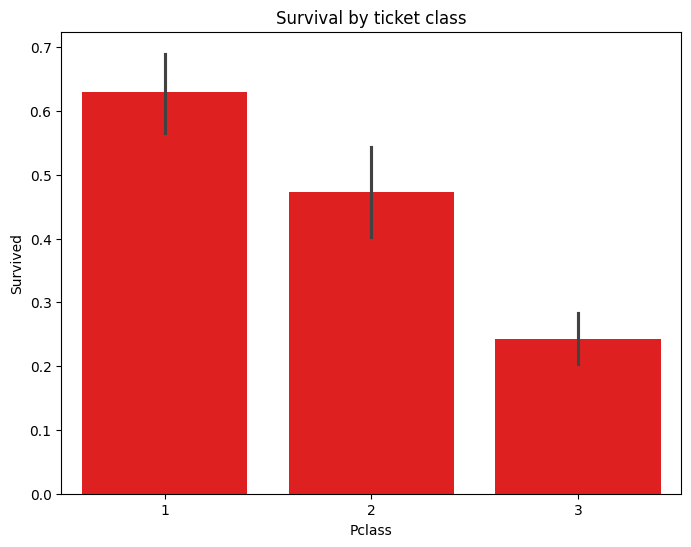

In [23]:
#Barplot showing survival by gender and ticket class
#By gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex',y='Survived',data=t_data,color='lightblue')
plt.title('Survival by gender')
plt.show()

#By ticket class
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass',y='Survived',data=t_data,color='red')
plt.title('Survival by ticket class')
plt.show()